In [135]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [136]:
data_2014 = pd.read_csv("data_preprocessing_revised/data_preprocessing_2014.csv", index_col=0)
data_2015 = pd.read_csv("data_preprocessing_revised/data_preprocessing_2015.csv", index_col=0)

In [137]:
data_2014 = data_2014.iloc[:, :28]

In [138]:
data_2015 = data_2015[['Name', 'Salary']]

In [139]:
data = pd.merge(data_2014, data_2015,
             how='inner',
             on='Name',
             left_index=False,
             right_index=False,
             sort=False,
             suffixes=('_x', '_y'),
             copy=True,
             indicator=False)

In [140]:
data

,Name,Age,Tm,Lg,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Salary
0,Jose Abreu\abreujo02,27.0,CHW,AL,145,622,556,80,176,35,...,0.581,0.964,173.0,323,14,11,0,4,15,8666000
1,Dustin Ackley*\ackledu01,26.0,SEA,AL,143,542,502,64,123,27,...,0.398,0.692,99.0,200,10,3,3,2,1,2600000
2,Matt Adams*\adamsma01,25.0,STL,NL,142,563,527,55,152,34,...,0.457,0.779,116.0,241,9,3,0,7,5,534000
3,Yonder Alonso*\alonsyo01,27.0,SDP,NL,84,288,267,27,64,19,...,0.397,0.682,96.0,106,8,1,0,3,1,1650000
4,Jose Altuve\altuvjo01,24.0,HOU,AL,158,707,660,85,225,47,...,0.453,0.830,135.0,299,20,5,1,5,7,2500000
5,Pedro Alvarez*\alvarpe01,27.0,PIT,NL,122,445,398,46,92,13,...,0.405,0.717,101.0,161,12,2,0,0,6,5750000
6,Elvis Andrus\andruel01,25.0,TEX,AL,157,685,619,72,163,35,...,0.333,0.647,81.0,206,21,3,9,7,0,15000000
7,Nori Aoki*\aokino01,32.0,KCR,AL,132,549,491,63,140,22,...,0.360,0.710,99.0,177,5,6,8,1,0,4000000
8,Oswaldo Arcia*\arciaos01,23.0,MIN,AL,103,410,372,46,86,16,...,0.452,0.752,108.0,168,6,6,0,1,4,532500
9,Nolan Arenado\arenano01,23.0,COL,NL,111,467,432,58,124,34,...,0.500,0.828,115.0,216,13,4,1,5,1,512500


In [141]:
X = data.drop(['Name', 'Tm', 'Lg'], axis = 1)

In [142]:
X.corrwith(X['Salary'])

Age       0.465436
G         0.354674
PA        0.452931
AB        0.439048
R         0.440628
H         0.445492
2B        0.423374
3B        0.000239
HR        0.400924
RBI       0.515301
SB        0.047223
CS        0.042424
BB        0.463434
SO        0.289209
BA        0.266855
OBP       0.343086
SLG       0.317593
OPS       0.348505
OPS+      0.360806
TB        0.466357
GDP       0.420886
HBP       0.171389
SH       -0.234500
SF        0.418287
IBB       0.406812
Salary    1.000000
dtype: float64

In [127]:
X = X.iloc[:, 0:25]
y = data['Salary']

In [128]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))

print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  -24041437.087528132
b value =  [ 9.33182882e+05 -1.13332999e+05  7.93558496e+04 -6.52241768e+04
  6.15031845e+04  1.12828042e+05 -1.02699594e+05 -3.63309654e+04
 -1.71453058e+03  3.47201731e+04  1.91890137e+03  6.43935386e+04
 -4.79444935e+04  4.72707743e+04 -2.63770606e+07  1.23342771e+09
  1.24020782e+09 -1.22756712e+09  1.79033009e+04 -6.76771020e+04
  1.45568311e+05 -2.79007608e+05 -2.41162831e+05  2.40554333e+04
  1.51375454e+05]


In [129]:
residuals = y-prediction
residuals.describe()

count    2.900000e+02
mean    -1.545610e-07
std      5.048013e+06
min     -1.185500e+07
25%     -3.201871e+06
50%     -7.120258e+05
75%      1.958143e+06
max      3.346000e+07
Name: Salary, dtype: float64

In [130]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.4837907418897357


In [131]:
from sklearn.metrics import mean_squared_error

In [132]:
print('score = ', linear_regression.score(X =pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.4837907418897357
Mean_Squared_Error =  25394560336726.05
RMSE =  5039301.57231397


In [133]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [30, 30]

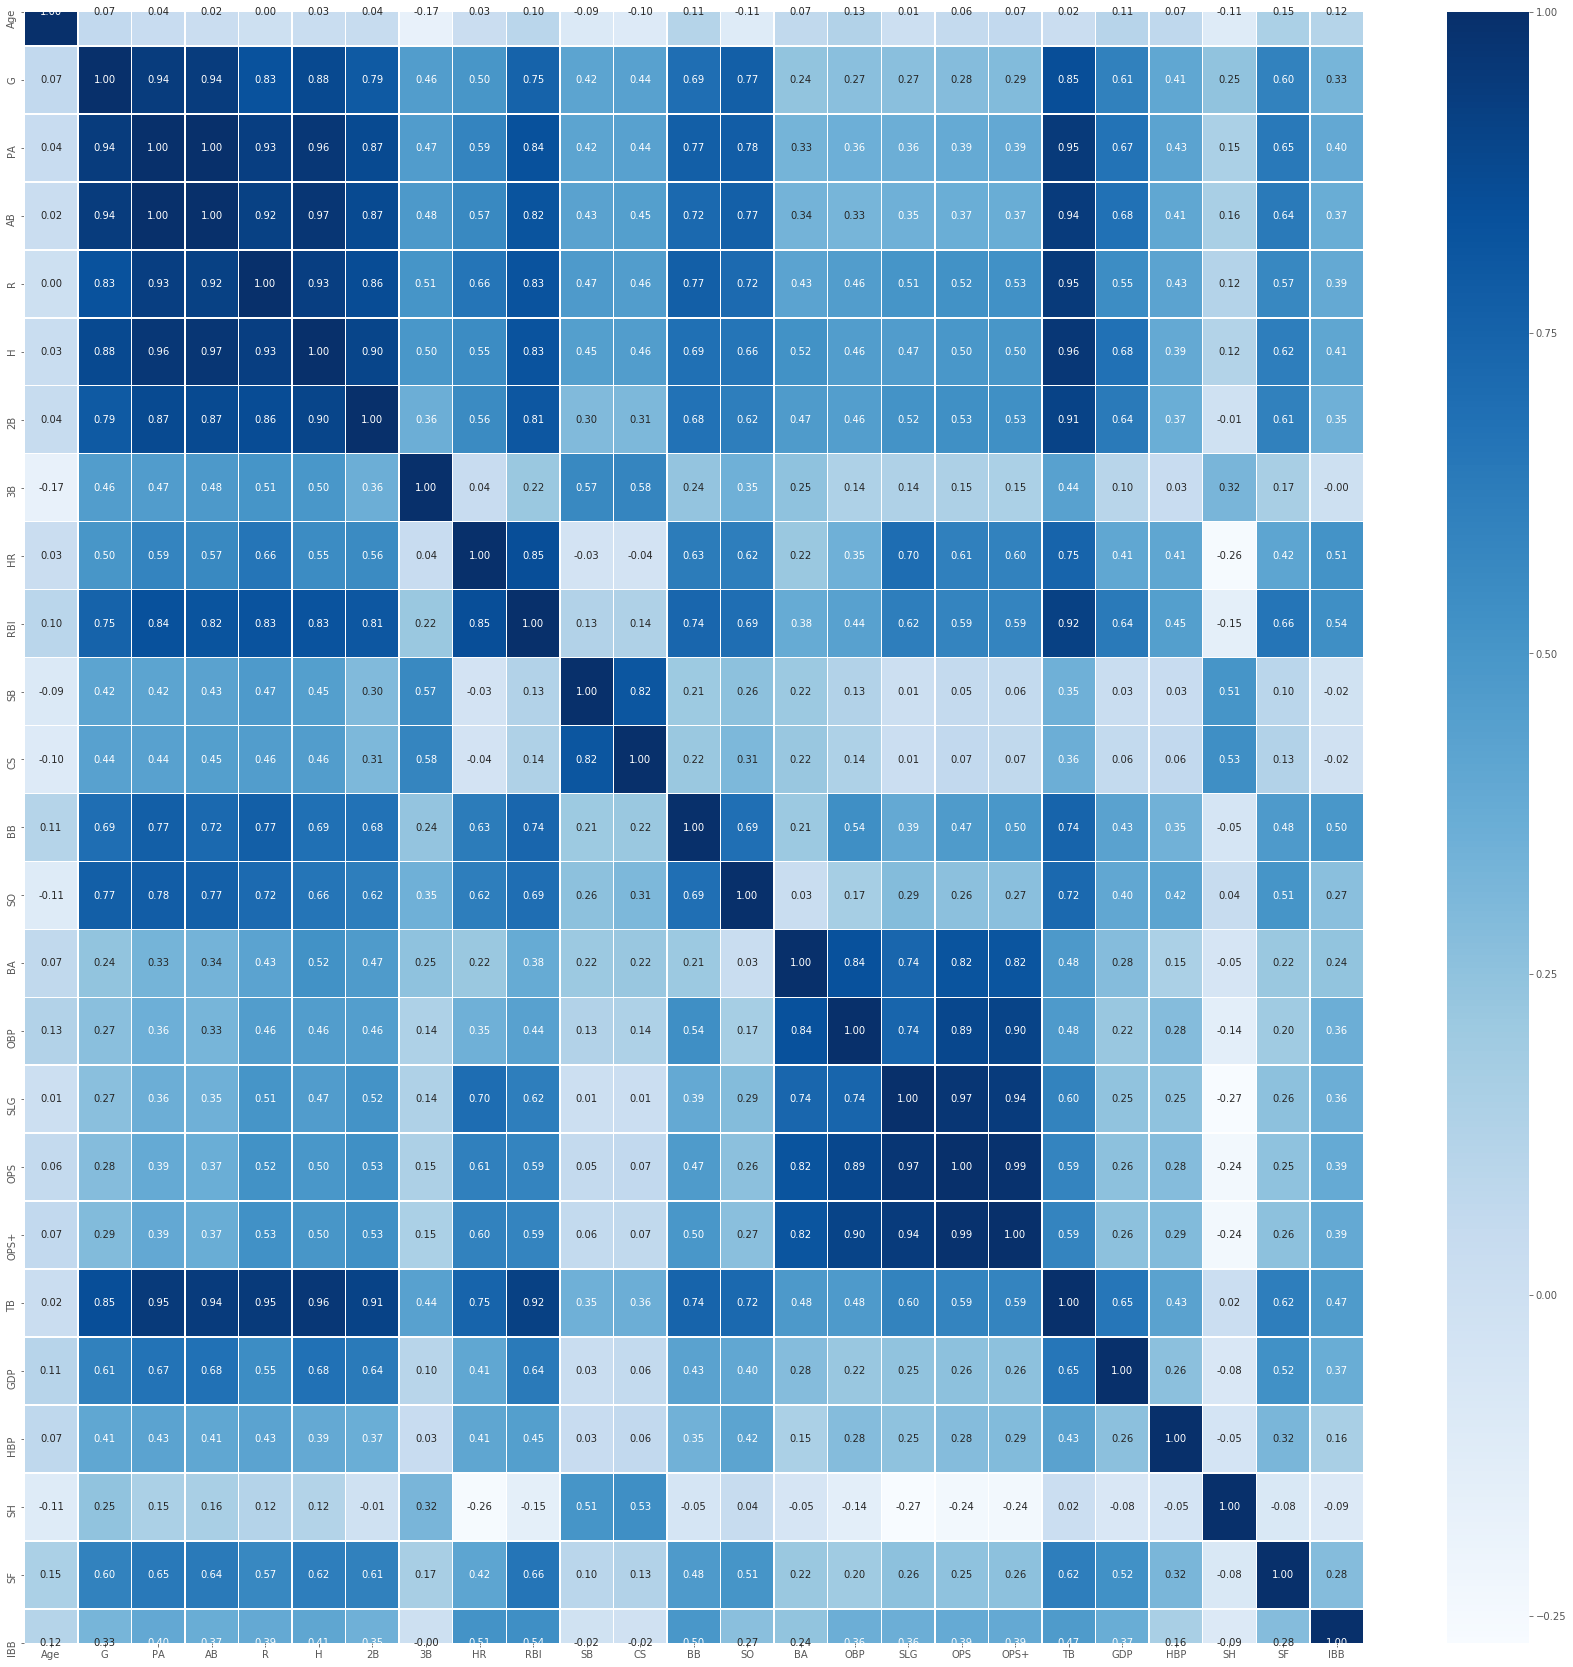

In [134]:
sns.heatmap(data = X.corr(), annot = True,
           fmt = '.2f', linewidths = .5, cmap = 'Blues')